<a href="https://colab.research.google.com/github/silvi3110/modelado-simulaci-n/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Crear datos de ejemplo: tamaño de casa vs precio
np.random.seed(42)
tamanos = np.random.normal(100, 30, 1000)  # 1000 casas, promedio 100m²
# Precio base + variación aleatorio (ruido)
precios = tamanos * 2000 + np.random.normal(0, 50000, 1000)

In [3]:
# Crear DataFrame
df = pd.DataFrame({'tamanos': tamanos, 'precios': precios})

# Dividir en 70% entrenamiento, 15% validación, 15% prueba
# Separar características (X) y variable objetivo (y)
X = df[['tamanos']]
y = df['precios']

# Primera división - 70% entrenamiento, 30% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Segunda división - del 30% temporal, 50% validación, 50% prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"\nDivisiones:")
print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")


Divisiones:
Entrenamiento: 700 muestras
Validación: 150 muestras
Prueba: 150 muestras


In [4]:
#Crear y entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)  # ¡Solo usamos datos de entrenamiento!

print("\nModelo entrenado")
print(f"Coeficiente (pendiente): {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

# Hacer predicciones en validación
y_val_pred = modelo.predict(X_val)
print(f"\nPredicciones de validación (primeras 5): {y_val_pred[:5]}")

# Evaluar en validación
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"\n RESULTADOS EN VALIDACIÓN:")
print(f"Error Cuadrático Medio (MSE): ${mse_val:,.0f}")
print(f"R² (varianza explicada): {r2_val:.2%}")


Modelo entrenado
Coeficiente (pendiente): 1919.19
Intercepto: 13166.44

Predicciones de validación (primeras 5): [170575.37010436 230863.10023114 103577.388749   177497.04575117
 156155.40203557]

 RESULTADOS EN VALIDACIÓN:
Error Cuadrático Medio (MSE): $2,255,366,377
R² (varianza explicada): 48.34%


In [5]:
# Evaluar el mejor modelo en datos de prueba
y_test_pred = modelo.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# MSE: Promedio de errores al cuadrado (menos es mejor)
# R²: Porcentaje de variabilidad explicada por el modelo (más es mejor)
print(f"\n--- EVALUACIÓN FINAL EN PRUEBA ---")
print(f"MSE: ${mse_test:,.0f}")
print(f"R²: {r2_test:.2%}")

# Predecir para una nueva casa
nueva_casa = np.array([[85]])  # 85m²
precio_predicho = modelo.predict(nueva_casa)
print(f"\nPredicción para casa de 85m²: ${precio_predicho[0]:,.0f}")

# Crear gráfico comparativo
plt.figure(figsize=(12, 5))


--- EVALUACIÓN FINAL EN PRUEBA ---
MSE: $2,634,469,133
R²: 62.67%

Predicción para casa de 85m²: $176,298


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

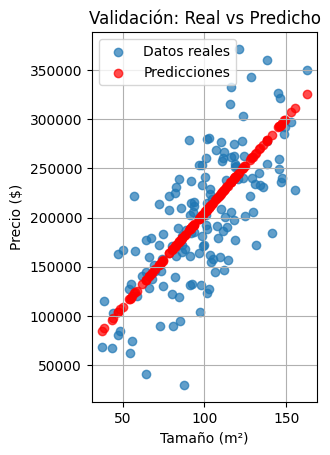

In [6]:
# Gráfico 1: Datos reales vs predicciones
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, alpha=0.7, label='Datos reales')
plt.scatter(X_val, y_val_pred, alpha=0.7, color='red', label='Predicciones')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio ($)')
plt.title('Validación: Real vs Predicho')
plt.legend()
plt.grid(True)

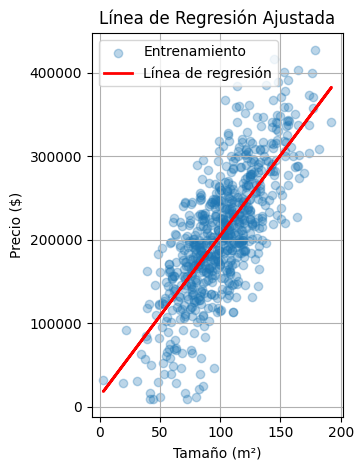

In [7]:
# Gráfico 2: Línea de regresión
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, alpha=0.3, label='Entrenamiento')
plt.plot(X_train, modelo.predict(X_train), color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio ($)')
plt.title('Línea de Regresión Ajustada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()